# Training a calibrator

In [1]:
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from sklearn.calibration import CalibratedClassifierCV
from pycalib.models import CalibratedModel
from pycalib.visualisations import plot_reliability_diagram

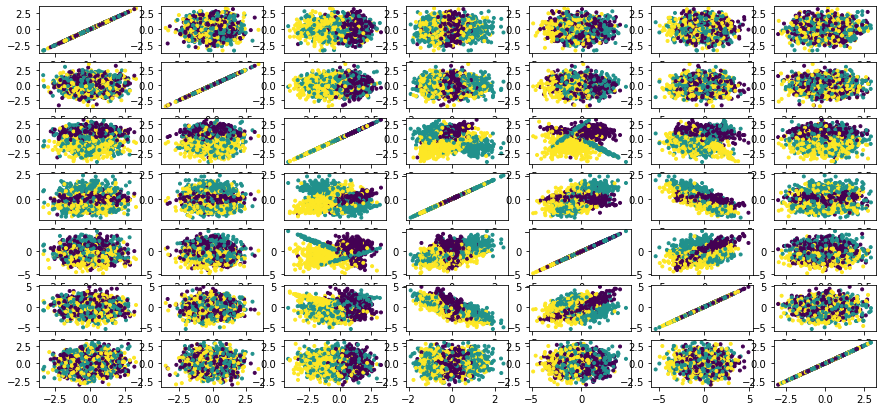

In [2]:
n_features = 7
X, y = datasets.make_classification(n_classes=3, n_samples=10000,
                                    n_clusters_per_class=2,
                                    n_features=n_features,
                                    n_informative=int(n_features/2),
                                    n_redundant=int(n_features/4),
                                    random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8,
                                                    random_state=42)

fig = plt.figure(figsize=(15, 7))
for i in range(n_features):
    for j in range(n_features):
        ax = fig.add_subplot(n_features, n_features, 1 + i + j*n_features)
        plt.scatter(X_train[:,i], X_train[:,j], c=y_train, marker='.')

# Training

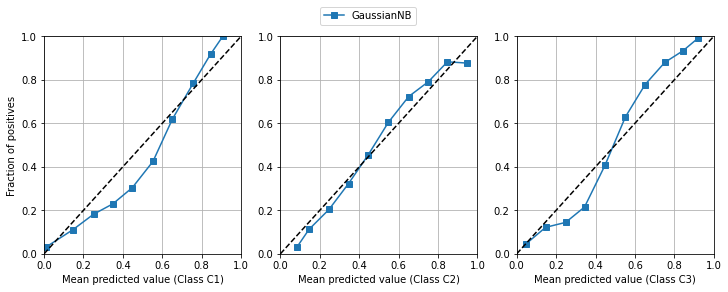

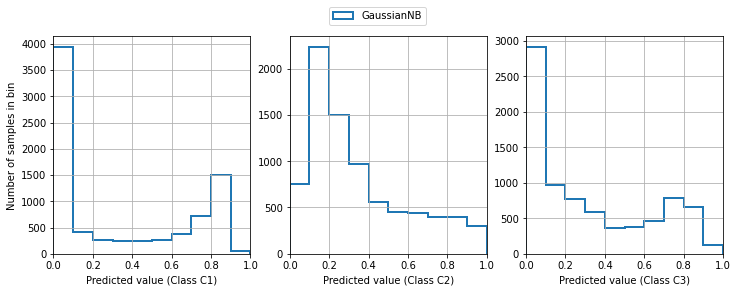

In [3]:
clf = GaussianNB()
clf.fit(X_train, y_train)
scores_clf = clf.predict_proba(X_test)

_ = plot_reliability_diagram(y_test, [scores_clf, ], legend=['GaussianNB', ],
                             histogram=True, class_names=['C1', 'C2', 'C3'])

###  Scikit-learn CV (sigmoid and isotonic)

The Scikit learn library has a method to train Isotonic Regression or Platt's scaling using cross-validation. The method trains several calibrators (one per cross-validation partition) and generates predictions according to the averaged scores.

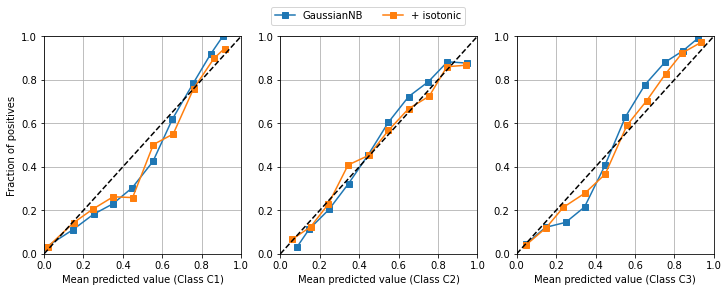

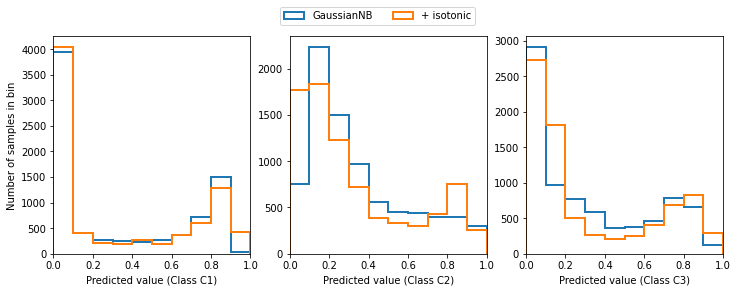

In [4]:
from sklearn.calibration import CalibratedClassifierCV

calibrator_name = 'isotonic' # try with 'sigmoid'

cal = CalibratedClassifierCV(clf, cv=2, method='isotonic')

cal.fit(X_train, y_train)
scores_cal = cal.predict_proba(X_test)

_ = plot_reliability_diagram(y_test, [scores_clf, scores_cal], legend=['GaussianNB', '+ {}'.format(calibrator_name)],
                             histogram=True, class_names=['C1', 'C2', 'C3'])

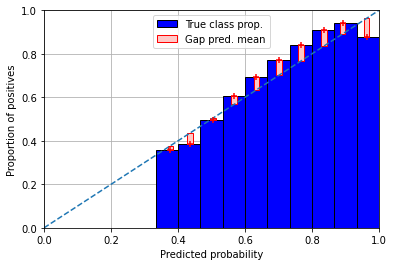

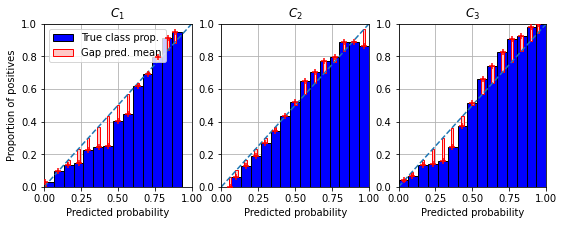

In [5]:
from pycalib.visualisations import plot_multiclass_reliability_diagram_gaps

_ = plot_multiclass_reliability_diagram_gaps(y_test, scores_clf, per_class=False)

fig = plt.figure(figsize=(9, 3))
ax = [fig.add_subplot(1, 3, j+1) for j in range(3)]
_ = plot_multiclass_reliability_diagram_gaps(y_test, scores_clf, fig=fig, ax=ax, per_class=True)

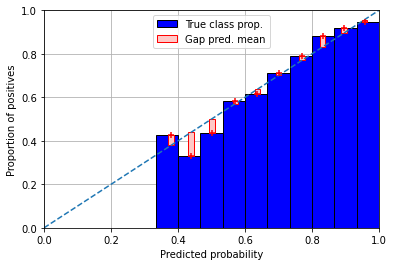

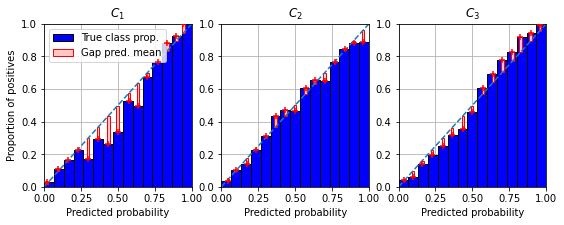

In [6]:
_ = plot_multiclass_reliability_diagram_gaps(y_test, scores_cal, per_class=False)

fig = plt.figure(figsize=(9, 3))
ax = [fig.add_subplot(1, 3, j+1) for j in range(3)]
_ = plot_multiclass_reliability_diagram_gaps(y_test, scores_cal, fig=fig, ax=ax, per_class=True)

### PyCalib CV (arbitrary calibrator)

In our NeurIPS experiments we adapted the Scikit-learn library to accept any arbitrary calibrator instead. However, after several libary upgrades (scikit-learn and others) the code needs to be updated. If time allows, this will be added.

## Test with other classifiers

You can test all the code above with any other classifier, the following are some examples from previous tutorial sections. You will need to import the corresponding class.

models = [(LinearRegression, {},"Linear Regression"),
          (LogisticRegression, {'C': 0.1},"Logistic Regression"),
          (KNeighborsClassifier, {},"K-Nearest Neighbors"),
          (MyDecisionTreeClassifier, {},"Decision Tree"),
          (GaussianNB, {},"Gaussian Naive Bayes"),
          (SVC, {'kernel':'linear', 'probability': True},"Linear SVM"),
          (SVC, {'kernel':'poly', 'degree':2, 'probability': True},"Polynomial 2 SVM"),
          (SVC, {'kernel':'poly', 'degree':3, 'probability': True},"Polynomial 3 SVM"),
          (SVC, {'kernel':'rbf', 'probability': True},"RBF SVM"),
          (MLPClassifier, {}, "MLP")]

# Another aproach

You can also use the CalibratedModel class that wraps together a classifier and any calibrator.

In [7]:
from pycalib.models import CalibratedModel, IsotonicCalibration

calibrator_name = 'isotonic' # try with 'sigmoid'

cal = CalibratedModel(GaussianNB(), method=IsotonicCalibration())

cal.fit(X_train, y_train)
scores_cal = cal.predict_proba(X_test)

_ = plot_reliability_diagram(y_test, [scores_clf, scores_cal], legend=['GaussianNB', '+ {}'.format(calibrator_name)],
                             histogram=True, class_names=['C1', 'C2', 'C3'])

ValueError: X should be a 1d array

# Multiclass

The previous CalibratedModel also works for multiclass problems. However, in that case if we want to use a binary calibrator we can wrap it into the ONeVsRestCalibrator from the PyCalib library.

In [ ]:
cal = CalibratedModel(GaussianNB(), method=OneVsRestCalibrator(IsotonicCalibration()))
